# Comparison of vehicular collisions across different seasons and times of the day

In [4]:
# First, we will load required packages
library(tidyverse)
library(repr)
library(readxl)
library(infer)
library(knitr)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Introduction

Car accidents have been among the leading causes of injuries and deaths around the world, leading all causes of preventable deaths globally in 2019 at nearly 1.3 million. (“International Overview,” n.d.). Furthermore, according to Transport Canada, environmental factors have consistently made up around or over 20% of all causes of car accidents in the country from 2015 to 2019 (Transport Canada, 2021). This project aims to investigate the relationship between the time and season-related changes and the occurrence of car accidents in Vancouver.

Taken from the Vancouver Police Department website, our dataset originally includes all crimes that occurred in the West Point Grey neighbourhood from 2003 to 2022 with relevant information recorded in separate variable columns (the headers of each column are shown in the parentheses):
- Type of crime (TYPE)
- Year of occurrence (YEAR)
- Month of occurrence (MONTH)
- Day of occurrence (DAY)
- Hour of occurrence (HOUR)
- Minute of occurrence (MINUTE)
- Hundred block of location (HUNDRED_BLOCK)
- Neighbourhood of location (NEIGHBOURHOOD)
- X-coordinate of location (X)
- Y-coordinate of location (Y)
Of all crimes, our crime types of interest are “Vehicle Collision or Pedestrian Struck (with Fatality)” and “Vehicle Collision or Pedestrian Struck (with Injury)”. The rest of the crimes will be filtered out.

Our inferential question will be to estimate the difference in proportions of car accidents that happen in the summer (which we classify as April to September) and winter (which we classify as October to March) and the difference in proportions of those that happen during daytime (which we classify as 6 am to 5:59 pm) and nightime (which we classify as 6 pm to 5:59 am)in Vancouver from 2003 to 2022, using the West Point Grey neighbourhood as a sample. We will then examine the difference in the two proportions to help us reach a possible conclusion.



## Preliminary Exploratory Data Analysis

In [5]:
# Data source: 
url <- "https://raw.githubusercontent.com/bernie-leung/STAT-201-group20newrepo/main/crimedata_csv_West%20Point%20Grey_AllYears.csv?token=GHSAT0AAAAAABWZIEUMCDZNWHJBZOIGRVVYYW4QFGA"

# Read data source
crimes <- read_csv(url)
head(crimes)

Rows: 9247 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2022,6,5,10,0,13XX DISCOVERY ST,West Point Grey,485246.9,5458027
Break and Enter Commercial,2004,6,30,0,1,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,5,9,15,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,8,22,20,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,11,1,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2011,3,31,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013


In [6]:
# created a data frame contraining only the crime types of interest 
collisions <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    mutate(MONTH = as_factor(MONTH))
    
head(collisions)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Vehicle Collision or Pedestrian Struck (with Fatality),2017,8,6,9,18,42XX BLOCK W 4TH AVE,West Point Grey,485442,5457333
Vehicle Collision or Pedestrian Struck (with Fatality),2021,10,10,23,25,42XX NAUTILUS CLS,West Point Grey,485300,5457357
Vehicle Collision or Pedestrian Struck (with Fatality),2007,11,20,1,44,42XX W 4TH AVE,West Point Grey,485442,5457333
Vehicle Collision or Pedestrian Struck (with Fatality),2020,9,28,17,9,W 10TH AVE / SASAMAT ST,West Point Grey,484785,5456806
Vehicle Collision or Pedestrian Struck (with Fatality),2019,5,23,14,22,W 4TH AVE / BLANCA ST,West Point Grey,484359,5457394
Vehicle Collision or Pedestrian Struck (with Fatality),2003,3,20,19,29,W 4TH AVE / HIGHBURY ST,West Point Grey,486350,5457336


In [7]:
# data frame that has been grouped by month and Number of observations for each month

collisions_by_month <- collisions %>%
    group_by(MONTH) %>%
    summarise(count = sum(MONTH == MONTH))

# Table: how many observations for each month

kable(collisions_by_month, caption = "Number of observations for each month")




Table: Number of observations for each month

|MONTH | count|
|:-----|-----:|
|1     |    27|
|2     |    21|
|3     |    28|
|4     |    33|
|5     |    41|
|6     |    32|
|7     |    42|
|8     |    38|
|9     |    38|
|10    |    37|
|11    |    27|
|12    |    20|

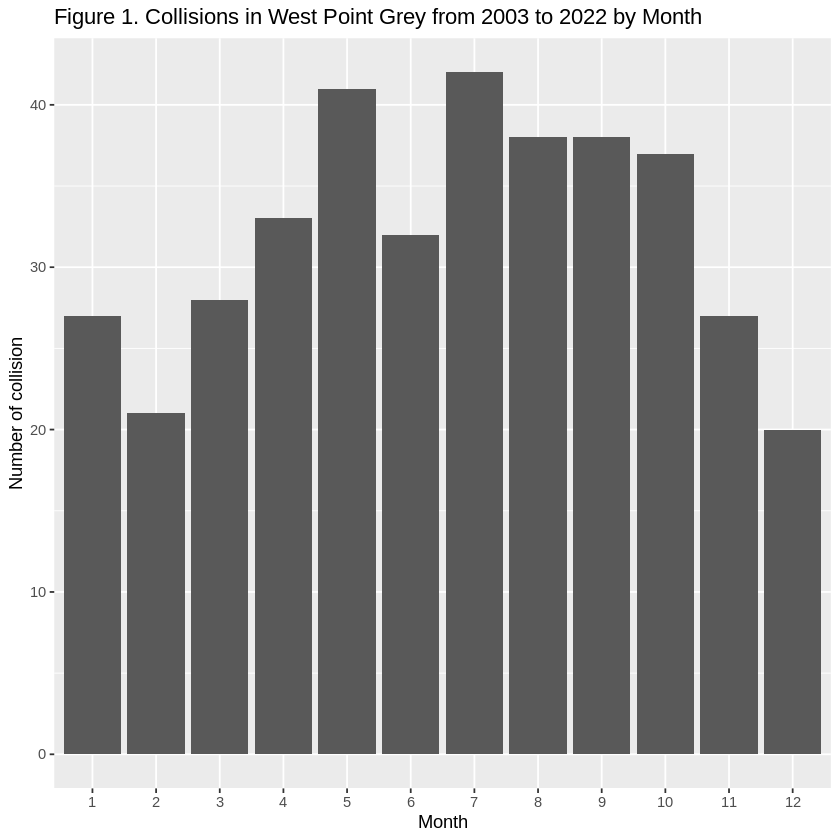

In [8]:
# visualize the oberservation 
collisions_graph_month <- collisions_by_month %>%
    ggplot(aes(x = MONTH, y = count)) +
    geom_bar(stat = "Identity") +
    labs(x = "Month", y = "Number of collision") +
    ggtitle("Figure 1. Collisions in West Point Grey from 2003 to 2022 by Month")

collisions_graph_month

As we can see from the graph, there are more number of collisions that happen in the summer (which we classify as April to September) than that happen in the winter (October to March) in West Point Grey neighbourhood from 2003 to 2022.

In [9]:
# data frame that has been grouped by hour and Number of observations for each type of crime
collisions_by_hour <- collisions %>%
    group_by(HOUR) %>%
    summarise(count = sum(HOUR == HOUR))

# Table: how many observations for each hour
kable(collisions_by_hour, caption = "Number of observations for each hour")



Table: Number of observations for each hour

| HOUR| count|
|----:|-----:|
|    0|     7|
|    1|     8|
|    2|     5|
|    3|     1|
|    4|     1|
|    5|     5|
|    6|     3|
|    7|    13|
|    8|    20|
|    9|    19|
|   10|    16|
|   11|    15|
|   12|    22|
|   13|     9|
|   14|    23|
|   15|    35|
|   16|    33|
|   17|    38|
|   18|    36|
|   19|    23|
|   20|    25|
|   21|    14|
|   22|    10|
|   23|     3|

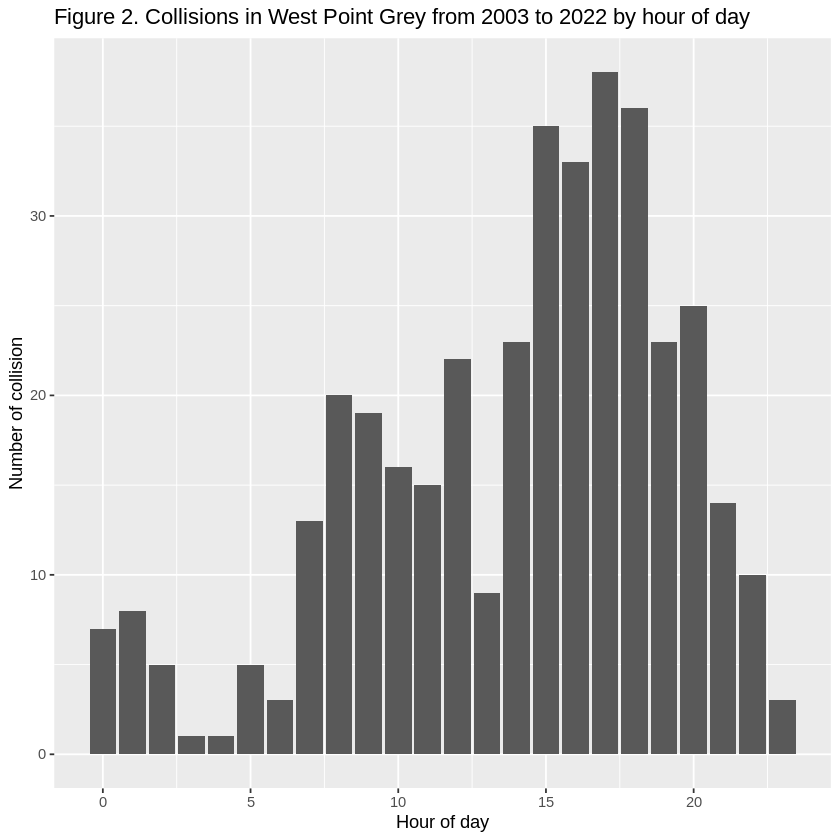

In [10]:
# visualize the observation 
collisions_graphs_hour <- collisions_by_hour %>%
    ggplot(aes(x = HOUR, y = count)) +
    geom_bar(stat = "Identity") +
    labs(x = "Hour of day", y = "Number of collision") +
    ggtitle("Figure 2. Collisions in West Point Grey from 2003 to 2022 by hour of day")
collisions_graphs_hour

### Preliminary Results

In [11]:
## draw a sample from the population to calculate the point estimate concerning the season
set.seed(11)
sample_prop_summer <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>% 
    rep_sample_n(size = 100) %>% 
    filter(MONTH == 4| MONTH == 5| MONTH == 6| MONTH == 7| MONTH == 8| MONTH == 9) %>%
    nrow()/100

sample_prop_summer

[1] 0.55

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during summer.

In [12]:
set.seed(12)
sample_prop_winter <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    rep_sample_n(size = 100) %>%
    filter(MONTH == 10| MONTH == 11| MONTH == 12| MONTH == 1| MONTH == 2| MONTH == 3) %>% 
    nrow()/100

sample_prop_winter

[1] 0.45

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during winter.

In [13]:
## calculate the difference between two point estimates
diff_sample_props <- sample_prop_summer - sample_prop_winter
diff_sample_props

[1] 0.1

0.1 is the difference of the sample proportions between summer and winter.

In [14]:
## create a table to present the sample proportions

tab_prop <- matrix(c(0.55, 0.45, 0.1), ncol=3, byrow=TRUE)
colnames(tab_prop) <- c(" Summer sample prop ", " Winter sample prop ", " Difference in props ")
rownames(tab_prop) <- c("proportion")
tab_prop <- as.table(tab_prop)
tab_prop


            Summer sample prop   Winter sample prop   Difference in props 
proportion                 0.55                 0.45                  0.10

This table shows the sample proportions in summer and winter and their difference.

In [15]:
## draw a sample from the population to calculate the point estimate concerning hour of day
set.seed(10)
sample_prop_day <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>% 
    rep_sample_n(size = 100) %>% 
    filter(HOUR == 6| HOUR == 7| HOUR == 8| HOUR == 9| HOUR == 10| HOUR == 11 | HOUR == 12| HOUR == 13| HOUR == 14| HOUR == 15| HOUR == 16| HOUR == 17) %>%
    nrow()/100

sample_prop_day

[1] 0.64

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during daytime.

In [16]:
set.seed(10)
sample_prop_night <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>% 
    rep_sample_n(size = 100) %>% 
    filter(HOUR == 18| HOUR == 19| HOUR == 20| HOUR == 21| HOUR == 22| HOUR == 23 | HOUR == 0| HOUR == 1| HOUR == 2| HOUR == 3| HOUR == 4| HOUR == 5) %>%
    nrow()/100

sample_prop_night

[1] 0.36

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during nighttime.

In [17]:
## calculate the difference between two point estimates
diff_sample_props_time_of_day <- sample_prop_day - sample_prop_night
diff_sample_props_time_of_day

[1] 0.28

0.28 is the difference of the sample proportions between daytime and nighttime.

In [18]:
## create a table to present the sample proportions
tab_prop <- matrix(c(0.64, 0.36, 0.28), ncol=3, byrow=TRUE)
colnames(tab_prop) <- c(" Daytime sample prop ", " Nighttime sample prop ", " Difference in props ")
rownames(tab_prop) <- c("proportion")
tab_prop <- as.table(tab_prop)
tab_prop

            Daytime sample prop   Nighttime sample prop   Difference in props 
proportion                  0.64                    0.36                  0.28

This table shows the sample proportions in daytime and nighttime and their difference.

### Methods: Plan
So far the advantages of our report are that it contains data from a credible source and that we have done a rough prelimnary analysis by computing the sample proportions of accidents that occur in each of the two seasons from our sample neighbourhood. However, the analysis done so far is only based on one sample from our chosen neighbourhood, which would make it hard for us to generalize our results to our population of all car accidents in Vancouver.

New data frames are created which contain SEASON and TIME_DAY columns which have values “SUMMER”, “WINTER” and “DAY”, “NIGHT” based on the month and time of day respectively.  
 
Since we are using a binary classification system for both season and time of day...
 
1.     NULL HYPOTHESIS 
H0: The proportion of accidents in summer is equal to 0.5
                                        vs 
       ALTERNATE HYPOTHESIS
HA: The proportion of accidents in summer is not equal to 0.5
 
2.     NULL HYPOTHESIS 
H0: The proportion of accidents in daytime is equal to 0.5
                                        vs 
       ALTERNATE HYPOTHESIS
HA: The proportion of accidents in daytime is not equal to 0.5
 
The test statistic value will be then calculated for both cases which is followed by hypothesis testing using the infer package workflow to get corresponding p values and confidence intervals. 



In [19]:
collisions_by_season <- crimes %>%
                        mutate(SEASON = ifelse(MONTH %in% 4:9, "SUMMER", "WINTER")) %>%
                        mutate(TYPE = ifelse(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "Collision", "Non-collision"))
head(collisions_by_season)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,SEASON
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Non-collision,2022,6,5,10,0,13XX DISCOVERY ST,West Point Grey,485246.9,5458027,SUMMER
Non-collision,2004,6,30,0,1,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,SUMMER
Non-collision,2009,5,9,15,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,SUMMER
Non-collision,2009,8,22,20,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,SUMMER
Non-collision,2009,11,1,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,WINTER
Non-collision,2011,3,31,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,WINTER


Above is the collision by season data frame.

In [20]:
collisions_by_time_of_day <- crimes %>%
                        mutate(TIME_DAY = ifelse(HOUR %in% 6:17, "DAY", "NIGHT")) %>%
                        mutate(TYPE = ifelse(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "Collision", "Non-collision"))
head(collisions_by_time_of_day)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,TIME_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Non-collision,2022,6,5,10,0,13XX DISCOVERY ST,West Point Grey,485246.9,5458027,DAY
Non-collision,2004,6,30,0,1,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,NIGHT
Non-collision,2009,5,9,15,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,DAY
Non-collision,2009,8,22,20,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,NIGHT
Non-collision,2009,11,1,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,DAY
Non-collision,2011,3,31,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,DAY


Above is the collision by time of the day data frame.

Ultimately, we expect to find a relationship between the changes in time and season and the occurrence of car accidents in Vancouver. We hope that if the said relationship is significant, it can help raise awareness to driving hazards in specific seasons and times of day. We also hope our findings can give rise to possible future investigations on third variables related to environmental changes that are possibly influencing our relationships of interest.

In [21]:
## filter the collision by season dataset
season <- collisions_by_season %>%
    filter(TYPE == "Collision")

head(season)

## perform hypothesis test via bootstrapping approach
hypo_test_season <- season %>%
    specify(response = SEASON, success = "SUMMER") %>%
    hypothesize(null = "point", p = 0.5) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "prop")

head(hypo_test_season)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,SEASON
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Collision,2017,8,6,9,18,42XX BLOCK W 4TH AVE,West Point Grey,485442,5457333,SUMMER
Collision,2021,10,10,23,25,42XX NAUTILUS CLS,West Point Grey,485300,5457357,WINTER
Collision,2007,11,20,1,44,42XX W 4TH AVE,West Point Grey,485442,5457333,WINTER
Collision,2020,9,28,17,9,W 10TH AVE / SASAMAT ST,West Point Grey,484785,5456806,SUMMER
Collision,2019,5,23,14,22,W 4TH AVE / BLANCA ST,West Point Grey,484359,5457394,SUMMER
Collision,2003,3,20,19,29,W 4TH AVE / HIGHBURY ST,West Point Grey,486350,5457336,WINTER


Warning message:
“You have given `type = "bootstrap"`, but `type` is expected to be `"simulate"`. This workflow is untested and the results may not mean what you think they mean.”


replicate,stat
<int>,<dbl>
1,0.5468750
2,0.5807292
3,0.5885417
4,0.5729167
5,0.5781250
6,0.5885417


In [22]:
## filter the collision by time of the day dataset
time <- collisions_by_time_of_day %>%
    filter(TYPE == "Collision")

head(time)

## perform hypothesis test via bootstrapping approach
hypo_test_time <- time %>%
    specify(response = TIME_DAY, success = "DAY") %>%
    hypothesize(null = "point", p = 0.5) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "prop")

head(hypo_test_time)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,TIME_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Collision,2017,8,6,9,18,42XX BLOCK W 4TH AVE,West Point Grey,485442,5457333,DAY
Collision,2021,10,10,23,25,42XX NAUTILUS CLS,West Point Grey,485300,5457357,NIGHT
Collision,2007,11,20,1,44,42XX W 4TH AVE,West Point Grey,485442,5457333,NIGHT
Collision,2020,9,28,17,9,W 10TH AVE / SASAMAT ST,West Point Grey,484785,5456806,DAY
Collision,2019,5,23,14,22,W 4TH AVE / BLANCA ST,West Point Grey,484359,5457394,DAY
Collision,2003,3,20,19,29,W 4TH AVE / HIGHBURY ST,West Point Grey,486350,5457336,NIGHT


Warning message:
“You have given `type = "bootstrap"`, but `type` is expected to be `"simulate"`. This workflow is untested and the results may not mean what you think they mean.”


replicate,stat
<int>,<dbl>
1,0.6588542
2,0.6744792
3,0.6510417
4,0.6302083
5,0.6041667
6,0.6432292


In [23]:
## obtain the observed test statistic regarding season
obs_season <- season %>%
    specify(response = SEASON, success = "SUMMER") %>%
    calculate(stat = "prop") %>%
    pull()


## obtain the observed test statistic regarding time of the day
obs_time <- time %>%
    specify(response = TIME_DAY, success = "DAY") %>%
    calculate(stat = "prop") %>%
    pull()

obs_season
obs_time

[1] 0.5833333

[1] 0.640625

p_value
<dbl>
1


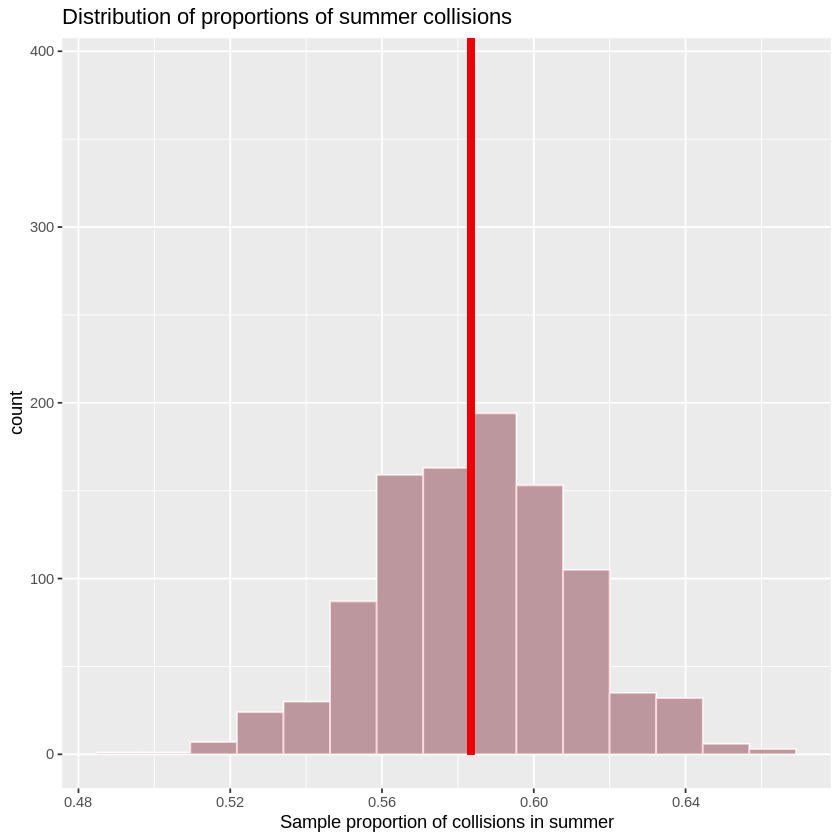

In [24]:
## visualize the hypothesis test regarding season
hypo_viz_season <- hypo_test_season %>%
    visualize() + 
    shade_p_value(obs_stat = obs_season, direction = "both") +
    labs(x = "Sample proportion of collisions in summer") +
    ggtitle("Distribution of proportions of summer collisions")

hypo_viz_season

## get the p-value regarding season
p_value_season <- hypo_test_season %>%
    get_p_value(obs_stat = obs_season, direction = "both")

p_value_season

p_value
<dbl>
1


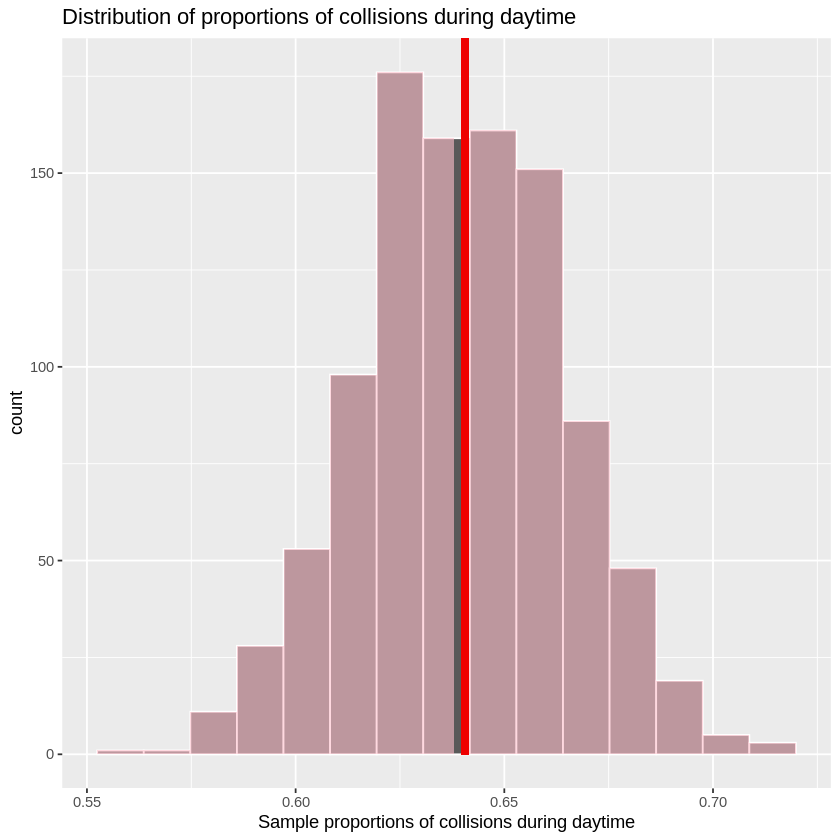

In [25]:
## visualize the hypothesis test regarding time of the day
hypo_viz_time <- hypo_test_time %>%
    visualize() + 
    shade_p_value(obs_stat = obs_time, direction = "both") +
    labs(x = "Sample proportions of collisions during daytime") +
    ggtitle("Distribution of proportions of collisions during daytime")

hypo_viz_time

## get the p-value regarding time of the day
p_value_time <- hypo_test_time %>%
    get_p_value(obs_stat = obs_time, direction = "both")

p_value_time

# report that p_value is less than 0.001 since we used 1000 reps

In [144]:
## getting sample proportion regarding season
phat_season <- mean(season$SEASON == "SUMMER")
phat_season
p0 <- 0.5
n <- nrow(season)

## doing one-sample z-test regarding season
z_season <- (phat_season - p0)/sqrt(p0 * (1-p0) / n)
z_season

## getting sample proportion regarding time of the day
phat_time <- mean(time$TIME_DAY == "DAY")
phat_time

## doing one-sample z-test regarding time of the day
z_time <- (phat_time - p0)/sqrt(p0 * (1-p0) / n)
z_time

[1] 0.5833333

[1] 3.265986

[1] 0.640625

[1] 5.511352

In [145]:
## using asymptotics approach to get the p-value regarding season
asymp_p_value_season <- 2 * pnorm(z_season, lower.tail = FALSE)
asymp_p_value_season

## using asymptotics approach to get the p-value regarding time of the day
asymp_p_value_time <- 2 * pnorm(z_time, lower.tail = FALSE)
asymp_p_value_time


[1] 0.001090835

[1] 3.560879e-08

In [149]:
## return detailed information about the hypothesis test regarding season
prop_test_season <- tidy(
        prop.test(
        x = phat_season * n,  # the number of successes,
        n = n,  # the number of trials, 
        p = 0.5, # p0 (i.e., the value of p under H0),
        alternative = "two.sided", # alternative hypothesis: "less", "greater", "two.sided"
        conf.level = 0.01, # the desired confidence level,
        correct = FALSE))

prop_test_season

## return detailed information about the hypothesis test regarding time of the day
prop_test_time <- tidy(
        prop.test(
        x = phat_time * n,  # the number of successes,
        n = n,  # the number of trials, 
        p = 0.5, # p0 (i.e., the value of p under H0),
        alternative = "two.sided", # alternative hypothesis: "less", "greater", "two.sided"
        conf.level = 0.01, # the desired confidence level,
        correct = FALSE))

prop_test_time

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.5833333,10.66667,0.001090835,1,0.583018,0.5836486,1-sample proportions test without continuity correction,two.sided


estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.640625,30.375,3.560879e-08,1,0.6403181,0.6409318,1-sample proportions test without continuity correction,two.sided


### References

International Overview. (2021, May 06). Retrieved from
    https://injuryfacts.nsc.org/international/international-overview/#:~:text=Motor-vehicle injuries are the,the world,
    with 84,000 fatalities.

Transport Canada. (2021, June 11). Canadian Motor Vehicle Traffic Collision Statistics: 2019. Retrieved from
    https://tc.canada.ca/en/road-transportation/statistics-data/canadian-motor-vehicle-traffic-collision-statistics-2019
